<a href="https://colab.research.google.com/github/LuigiSigillo/CartoonGAN/blob/main/DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartoonGAN-TensorFlow DEMO
Cartoonize your images using CartoonGAN, powered by TensorFlow 2.0. 

- [Report](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2-en.html)
- [Github repo](https://github.com/LuigiSigillo/CartoonGan)

## Clone github  repo
This repo contain the Python script that we will use to generate cartoon-style images.

In [1]:
import os
!git clone https://github.com/LuigiSigillo/CartoonGan.git
os.chdir(os.path.join("CartoonGan"))

from google.colab import files


Cloning into 'CartoonGan'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 313 (delta 13), reused 11 (delta 4), pack-reused 283
Receiving objects: 100% (313/313), 300.88 MiB | 31.78 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Checking out files: 100% (13/13), done.


## Install packages
We will need TensorFlow 2.0 

In [2]:
from IPython.display import clear_output, display, Image
import tensorflow as tf
!pip install tensorflow_addons
import time
#!pip install tensorflow-gpu==2.4.1
tf.__version__
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")
!mkdir {input_image_dir} && mkdir {output_image_dir}

     |████████████████████████████████| 706kB 7.4MB/s 


## Download or upload new images to cartoonize
Get url of the image that you wish to transform, and paste it in the form below. You can also keep the default url and see how it work. 

Supported format of the images:
- `.jpg`
- `.png`


## Download the image from the web and save it for transformation.

In [ ]:
image_url = 'https://i.imgur.com/bK7WTpr.jpg'  #@param ["https://i.imgur.com/ok1wbXo.jpg","https://i.imgur.com/gPPKRY8.jpg","https://i.imgur.com/bK7WTpr.jpg"]
upload = "False"

!rm input_images/*
img_filename = image_url.split("/")[-1]
name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
new_name = '_'.join((name, str(int(time.time()))))
new_img_filename = '.'.join((new_name, ext))
image_path = os.path.join(input_image_dir, new_img_filename)

!wget {image_url} && mv {img_filename} {new_img_filename} && mv {new_img_filename} {image_path}

## Upload local image

In [3]:
!rm input_images/*

upload = "True" #@param ["True","False"]

if upload=="True":
    upl_dic = files.upload()
    name = list(upl_dic.keys())[0]
    image_path = os.path.join(input_image_dir, name)
    !mv "{name}" "{image_path}"



rm: cannot remove 'input_images/*': No such file or directory


Saving photo5933510239141868417.jpg to photo5933510239141868417.jpg


## The image that we're going to cartoonize

If you pasted the correct image url in the previous cell, this part will just show you the downloaded image.

In [4]:
!ls input_images/
a = Image(image_path)
import PIL
image = PIL.Image.open(image_path)
width, height = image.size


photo5933510239141868417.jpg


## Cartoonize images using Python script
Transform the downloaded image using selected style.

In [6]:
styles = "hayao" #@param ["shinkai", "hayao", "paprika"]
#hayao = spirited away
#shinkai = your name

In [7]:
!python "cartoonize.py" \
    --styles {styles} \
    --batch_size 1 \
    --comparison_view horizontal


2021-03-11 21:43:28.394039: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-11 21:43:30.765208: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-11 21:43:30.782646: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-11 21:43:30.864659: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-03-11 21:43:30.864726: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e8812929a06b): /proc/driver/nvidia/version does not exist
2021-03-11 21:43:30.865086: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in perfo

## Compare input with the caroonized result

photo5933510239141868417.jpg
output_images/photo5933510239141868417.jpg


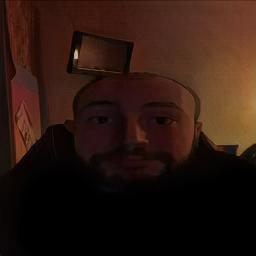

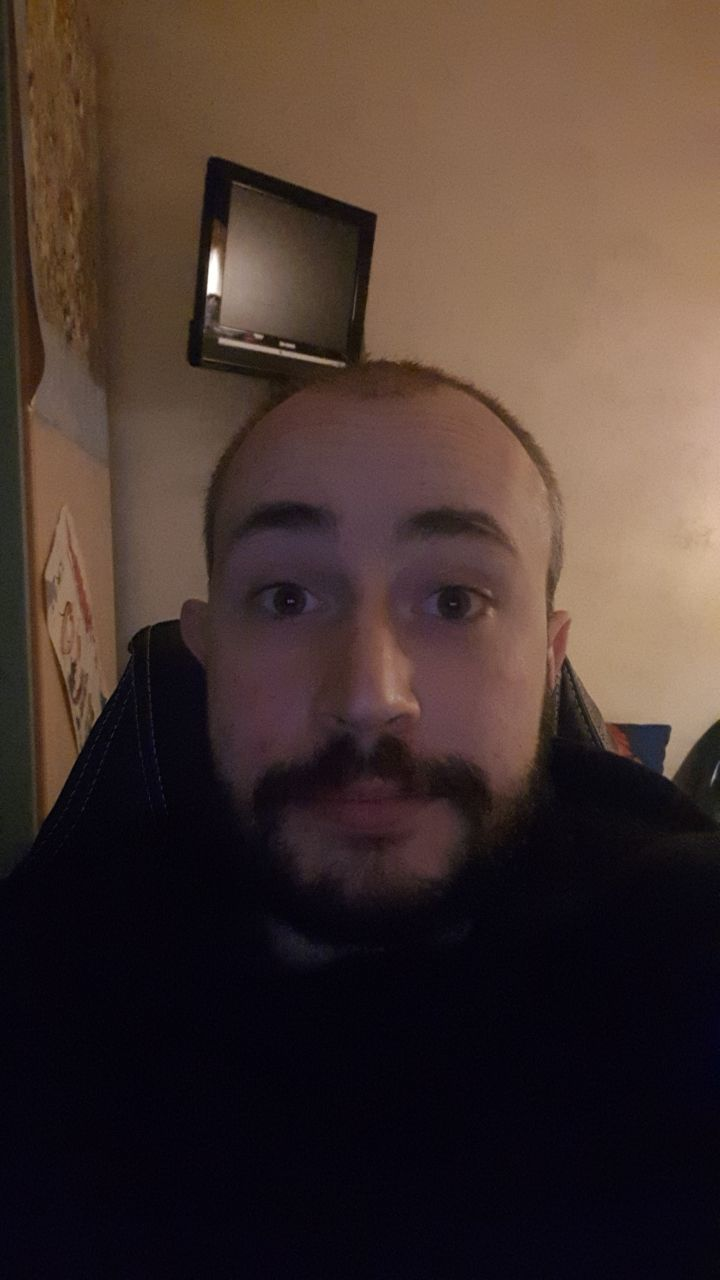

In [8]:
if upload =="False":
    result_path = os.path.join(output_image_dir, new_img_filename)
else:
    result_path = os.path.join(output_image_dir, name)

!ls output_images
print(result_path)
display(Image(result_path,width=width, height=height))
display(Image(image_path,width=width, height=height))

## Download the result


To download only the tranformed image , set `include_original_image` to `no`.

In [21]:
include_original_image = "no"  #@param {type: "string"}
from google.colab import files
if include_original_image == "yes":
    output_image_path = os.path.join(output_image_dir, "comparison", new_img_filename)
else:
    output_image_path = result_path
import cv2
dim = (width, height)
final_im = cv2.imread(output_image_path)
final_im = cv2.resize(final_im, dim, interpolation=cv2.INTER_LINEAR)
cv2.imwrite(output_image_path, final_im)
files.download(output_image_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>